In [93]:
import glob
import scipy
import matplotlib.pyplot as plt
import numpy as np
import json

from constant import wavelength_list_eve,wavelength_chianti
from gaussian_fit_eve import gaussian_fit_eve

In [7]:
eve_files=sorted(glob.glob('data/EVE_sav/EVS_L2*.sav'))

eve_data=[]
for eve_file in eve_files:
    eve_data.append( scipy.io.readsav(eve_file) )

## read sav files

In [15]:
eve_files=sorted(glob.glob('data/EVE_sav/EVS_L2*.sav'))
eve_files.__len__()

1097

In [16]:
eve_data=[]
for eve_file in eve_files:
    eve_data.append( scipy.io.readsav(eve_file) )

In [17]:
eve_data[0].keys()

dict_keys(['wavelength', 'sod_time', 'irradiance', 'sc_flags', 'flags', 'yyyydoy'])

In [18]:
eve_data[0]['irradiance'].shape

(360, 12)

In [22]:
eve_data[0]['irradiance']

array([[2.6577540e-05, 1.3054878e-04, 5.0076644e-04, ..., 2.0295245e-04,
        7.7421500e-05, 5.1503263e-05],
       [2.4021796e-05, 1.2664689e-04, 4.9904868e-04, ..., 2.0232500e-04,
        7.5521537e-05, 4.9475551e-05],
       [2.6913389e-05, 1.3122585e-04, 5.0163351e-04, ..., 2.0851009e-04,
        8.1240942e-05, 5.3733242e-05],
       ...,
       [2.5234902e-05, 1.2740187e-04, 4.9937767e-04, ..., 1.9790478e-04,
        7.4132186e-05, 5.0677150e-05],
       [2.6860454e-05, 1.3091910e-04, 5.0991599e-04, ..., 2.0304171e-04,
        7.6573844e-05, 5.0306742e-05],
       [2.5037920e-05, 1.2865101e-04, 4.9844879e-04, ..., 2.0035540e-04,
        7.2219787e-05, 5.0711267e-05]], dtype=float32)

In [19]:
eve_data[0]['wavelength'][1363:1375].shape

(12,)

In [20]:
eve_data[0]['wavelength'][1363:1375]

array([30.27, 30.29, 30.31, 30.33, 30.35, 30.37, 30.39, 30.41, 30.43,
       30.45, 30.47, 30.49], dtype=float32)

In [30]:
len(eve_data[0]['yyyydoy'])

360

## a day's average

In [72]:
obs={}
for i in range(len(eve_data)):
    for j in range( len(eve_data[i]['yyyydoy']) ):
        day=eve_data[i]['yyyydoy'][j]%1000
        # if obs[day] hasn't been created, just create an empty list
        if day not in obs:
            obs[day] = []
        # if obs[day] has been created, just append a new real number
        if(eve_data[i]['flags'][j]==0 and eve_data[i]['sc_flags'][j]==0):
            obs[day].append(gaussian_fit_eve(wavelength_list_eve,
                                         eve_data[i]['irradiance'][j]))
        
        
len(eve_data)

1097

In [74]:
obs.keys()

dict_keys([11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62])

In [76]:
for key in obs.keys():
    obs[key]=np.array(obs[key])

In [77]:
obs.keys()

dict_keys([11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 62])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


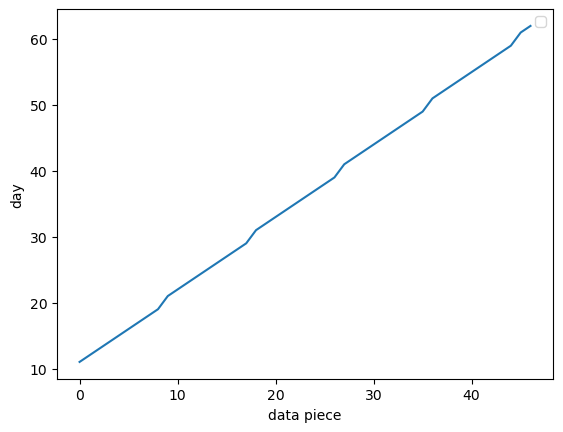

In [104]:
fig,ax=plt.subplots()
ax.plot(obs.keys())
#不是每天都有数据

ax.set_xlabel('data piece')
ax.set_ylabel('day')
ax.legend()

Text(0, 0.5, 'data amount')

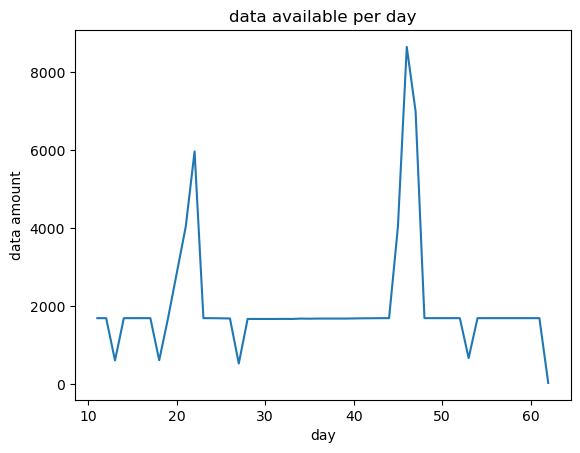

In [103]:
## 每天的数据量
fig,ax=plt.subplots()
ax.plot(obs.keys(),[len(obs[key]) for key in obs.keys()])
ax.set_title("data available per day")

ax.set_xlabel('day')
ax.set_ylabel('data amount')
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


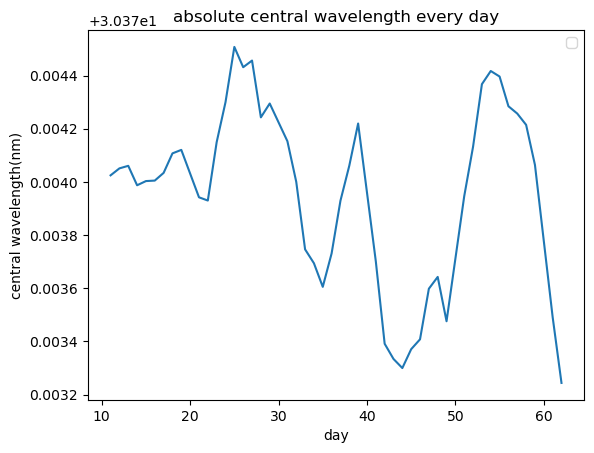

In [109]:
fig,ax=plt.subplots()
ax.plot(obs.keys(),[obs[key].mean() for key in obs.keys()])
ax.set_title('absolute central wavelength every day')

ax.set_xlabel('day')
ax.set_ylabel('central wavelength(nm)')
ax.legend()

In [98]:
-wavelength_chianti

-30.378264

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


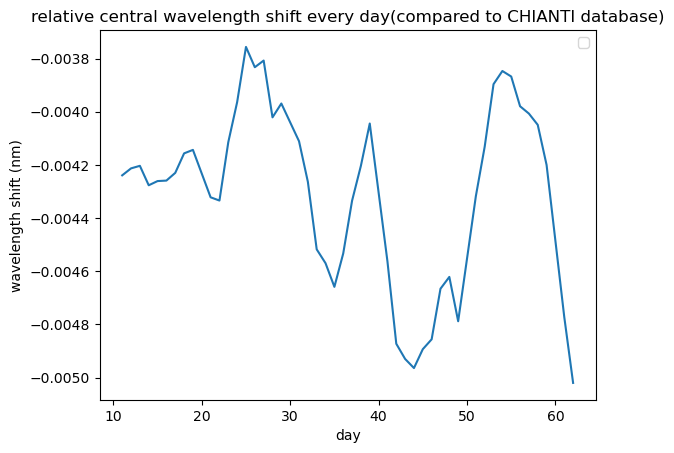

In [110]:

fig,ax=plt.subplots()
ax.plot(obs.keys(),[obs[key].mean()-wavelength_chianti for key in obs.keys()])
ax.set_title('relative central wavelength shift every day(compared to CHIANTI database)')

ax.set_xlabel('day')
ax.set_ylabel('wavelength shift (nm)')
ax.legend()

## plot irradiance

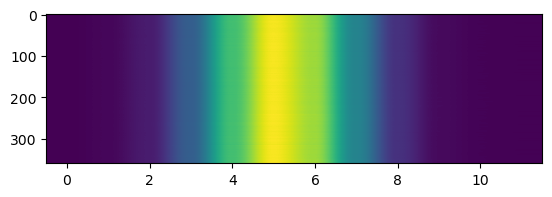

In [38]:
fig,ax=plt.subplots()
ax.imshow(eve_data[100]['irradiance'],aspect=0.01)

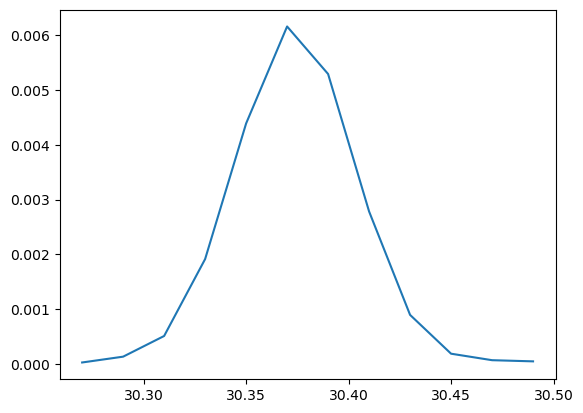

In [29]:
fig,ax=plt.subplots()
ax.plot(wavelength_list_eve,eve_data[10]['irradiance'][0])

In [8]:
for i in range(20):
    print(gaussian_fit_eve(wavelength_list_eve,eve_data[i]['irradiance'][1]))

30.37433775491488
30.374457624269397
30.374291386125293
30.374083547678854
30.374185662184697
30.374017247775495
30.374080344054164
30.374077641575923
30.37397580173524
30.373973294113505
30.373722341948206
30.373962535998842
30.374028980024857
30.37397865748616
30.374018782852005
30.37398593688754
30.373982483569602
30.374229890482408
30.37414809393975
30.374284998651376


In [33]:
eve_data[0]['irradiance'][90]

array([2.4629102e-05, 1.2479044e-04, 4.9889268e-04, 1.8884912e-03,
       4.3723290e-03, 6.1966116e-03, 5.3776670e-03, 2.8573815e-03,
       9.2897459e-04, 1.9565233e-04, 7.2687064e-05, 4.9935843e-05],
      dtype=float32)

In [36]:
gaussian_fit_eve(wavelength_list_eve,eve_data[0]['irradiance'][10])

30.374473360932054

## save a dict

In [121]:
mean_dict = {int(key): np.mean(arr)-wavelength_chianti for key, arr in obs.items()}
mean_dict

{11: -0.004239310241015204,
 12: -0.0042131158770537525,
 13: -0.004203512235761764,
 14: -0.004276632024950544,
 15: -0.004260873667359277,
 16: -0.004259020435920746,
 17: -0.0042300450484304974,
 18: -0.004156687354921473,
 19: -0.004143577588614278,
 21: -0.004321899398107121,
 22: -0.0043340849636201995,
 23: -0.004114510061327792,
 24: -0.0039640485620751065,
 25: -0.003756361418972176,
 26: -0.003832701557165308,
 27: -0.003807650878457025,
 28: -0.004021214325909739,
 29: -0.003969154104499495,
 31: -0.004110962837192034,
 32: -0.004263682049419515,
 33: -0.004517635314023494,
 34: -0.004569844981684668,
 35: -0.004658641042347256,
 36: -0.004533034557539395,
 37: -0.004334751459932562,
 38: -0.004203098692144636,
 39: -0.004044462524213088,
 41: -0.00456272950973613,
 42: -0.004872630679152223,
 43: -0.004929808511555223,
 44: -0.0049640461821347515,
 45: -0.00489309549217154,
 46: -0.004855955084931196,
 47: -0.004665701048395476,
 48: -0.0046213023682781795,
 49: -0.00478800

In [122]:
with open('mean_dict.json', 'w') as f:
    # Serialize and write the dictionary to the file in JSON format
    json.dump(mean_dict, f)

### read a dict json

In [113]:
with open('mean_dict.json', 'r') as f:
    # Load the JSON data into a Python dictionary
    a = json.load(f)

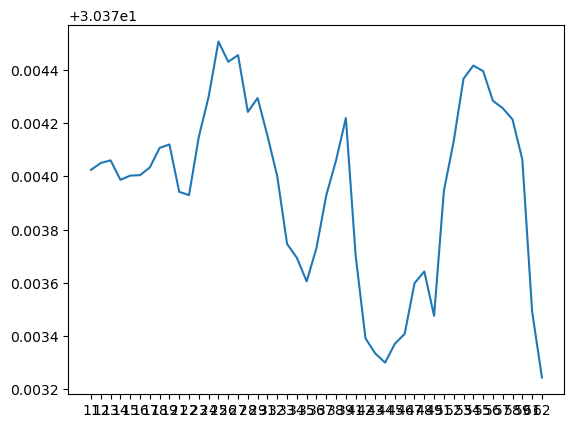

In [117]:
fig,ax=plt.subplots()
ax.plot(a.keys(),a.values())